# Data Mining CMP-7023B

## Lab 5: Supervised Learning - Classification Part 2 - Examples



### In the last lab exercises

We covered the introduction to classification, and we explained how to apply classification algorithms to our datasets. Identifying the labels and values in order to predict classification targets. We used a standard UCI dataset 'iris flower' and NASA-build satellite data 'Kepler Space Observatory'.

We considered how we can perform some pre-processing on our datasets to make classification more effective. We also finished looking at how we can measure the performance of our algorithms by using some basic evaluation metrics such as accuracy and confusion matrixes. 

### This week
In this lab, 

A. We will practice on another classification algorithm 'Decision Tree Classifier'. We will do this again by looking at the Iris dataset. You can then practice further by applying similar operations to another dataset.

We recommend that you look at the Kaggle courses for 'Tutorial for Classification' https://www.kaggle.com/code/gpreda/tutorial-for-classification/notebook and a 'Guide to any Classification Problem' https://www.kaggle.com/code/durgancegaur/a-guide-to-any-classification-problem.

B. We will then finish with looking at how we can measure the performance of our algorithms by explaining Precision, Recall and ROC curve. 

In [1]:
#make the plots bigger
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

import warnings
warnings.filterwarnings('ignore')

## Part A: Decision Tree Classifier

## 1: Loading the data, Assign independent features & classes

In this example we are using `Iris Flower Dataset`.
As usual we load the data first:

In [2]:
#load the data

#Some classification problems will give you pre defined train and test splits
#in this case, as we don't have a train test split I make one using the functionality in sklearn

import pandas as pd

iris = pd.read_csv("C:\DM-DATA\Iris.csv")

X = iris[["sepal_length", "petal_length", "petal_width"]]
y = iris["species"]

class_names = y.unique()

print(X)
print(y)


     sepal_length  petal_length  petal_width
0             5.1           1.4          0.2
1             4.9           1.4          0.2
2             4.7           1.3          0.2
3             4.6           1.5          0.2
4             5.0           1.4          0.2
..            ...           ...          ...
145           6.7           5.2          2.3
146           6.3           5.0          1.9
147           6.5           5.2          2.0
148           6.2           5.4          2.3
149           5.9           5.1          1.8

[150 rows x 3 columns]
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


#### label Encoder
Here we are encoding our target variable

In [3]:
from sklearn.preprocessing import LabelEncoder

#encode the labels from strings to values.
le = LabelEncoder()

y = le.fit_transform(y)
print("Original labels", le.classes_)
print("Labels after encoding", y)

Original labels ['setosa' 'versicolor' 'virginica']
Labels after encoding [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 2: Train and Test Split

Here we use the sklearn function `train_test_split` to create a train and test datasets for both the data and the labels. Setting `test_size=0.3` the test set (`X_test`) will be 30% of the samples in the dataset (`X`) and the train set (`X_train`) will contain 70% of the samples. 

In [4]:
#Divide the data into train and test splits

from sklearn.model_selection import train_test_split
#using train test split, i take the data and labels, and split them into a 70/30 train test set. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

## 3: Pre-Processing

Before we feed the dataset to the classifier, we can perform some pre-processing stages on our dataset. You should have looked at various pre-processing steps in the previous labs (see lab exercises 3,4,5).

In this example, similar to the last week, we perform `L2` normalisation on the train and test set <b>together</b>. As we mentioned in the last lab this is important in the case of normalisation because when we calculate the mean and standard deviation for the dataset, if we normalised the dataset as a continuous block we would get potentially different values for each sample, when compared with normalising together. Additionally, It's important to normalise the test data using the mean and standard deviation of the train so that the normalisation is <b>consistent</b> but doesn't introduce bias from looking at the train data. Hence the model for normalisation is obtained from the train data but then applied to the test data.


In [5]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer(norm='l2')
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)


## 4: Classification

### Decision Tree Classifier
Decision Tree Classifier, where we use Entropy for the information gain (criterion='entropy') to determine the splitting criteria.

In [6]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion='entropy')

## 5: Fit the data to the model
Here we call the fit function, passing in the train data and the train labels.

In [7]:
clf_tree.fit(X_train,y_train);

DecisionTreeClassifier is capable of both binary classification and multiclass classification. Using the iris dataset we have trained our tree, and we can plot what that tree looks like using the tree Module in sklearn. In particular there is a method plot_tree for visualising the model. Spend some time trying to understand what the model visualisation is telling us about how decisions are made.

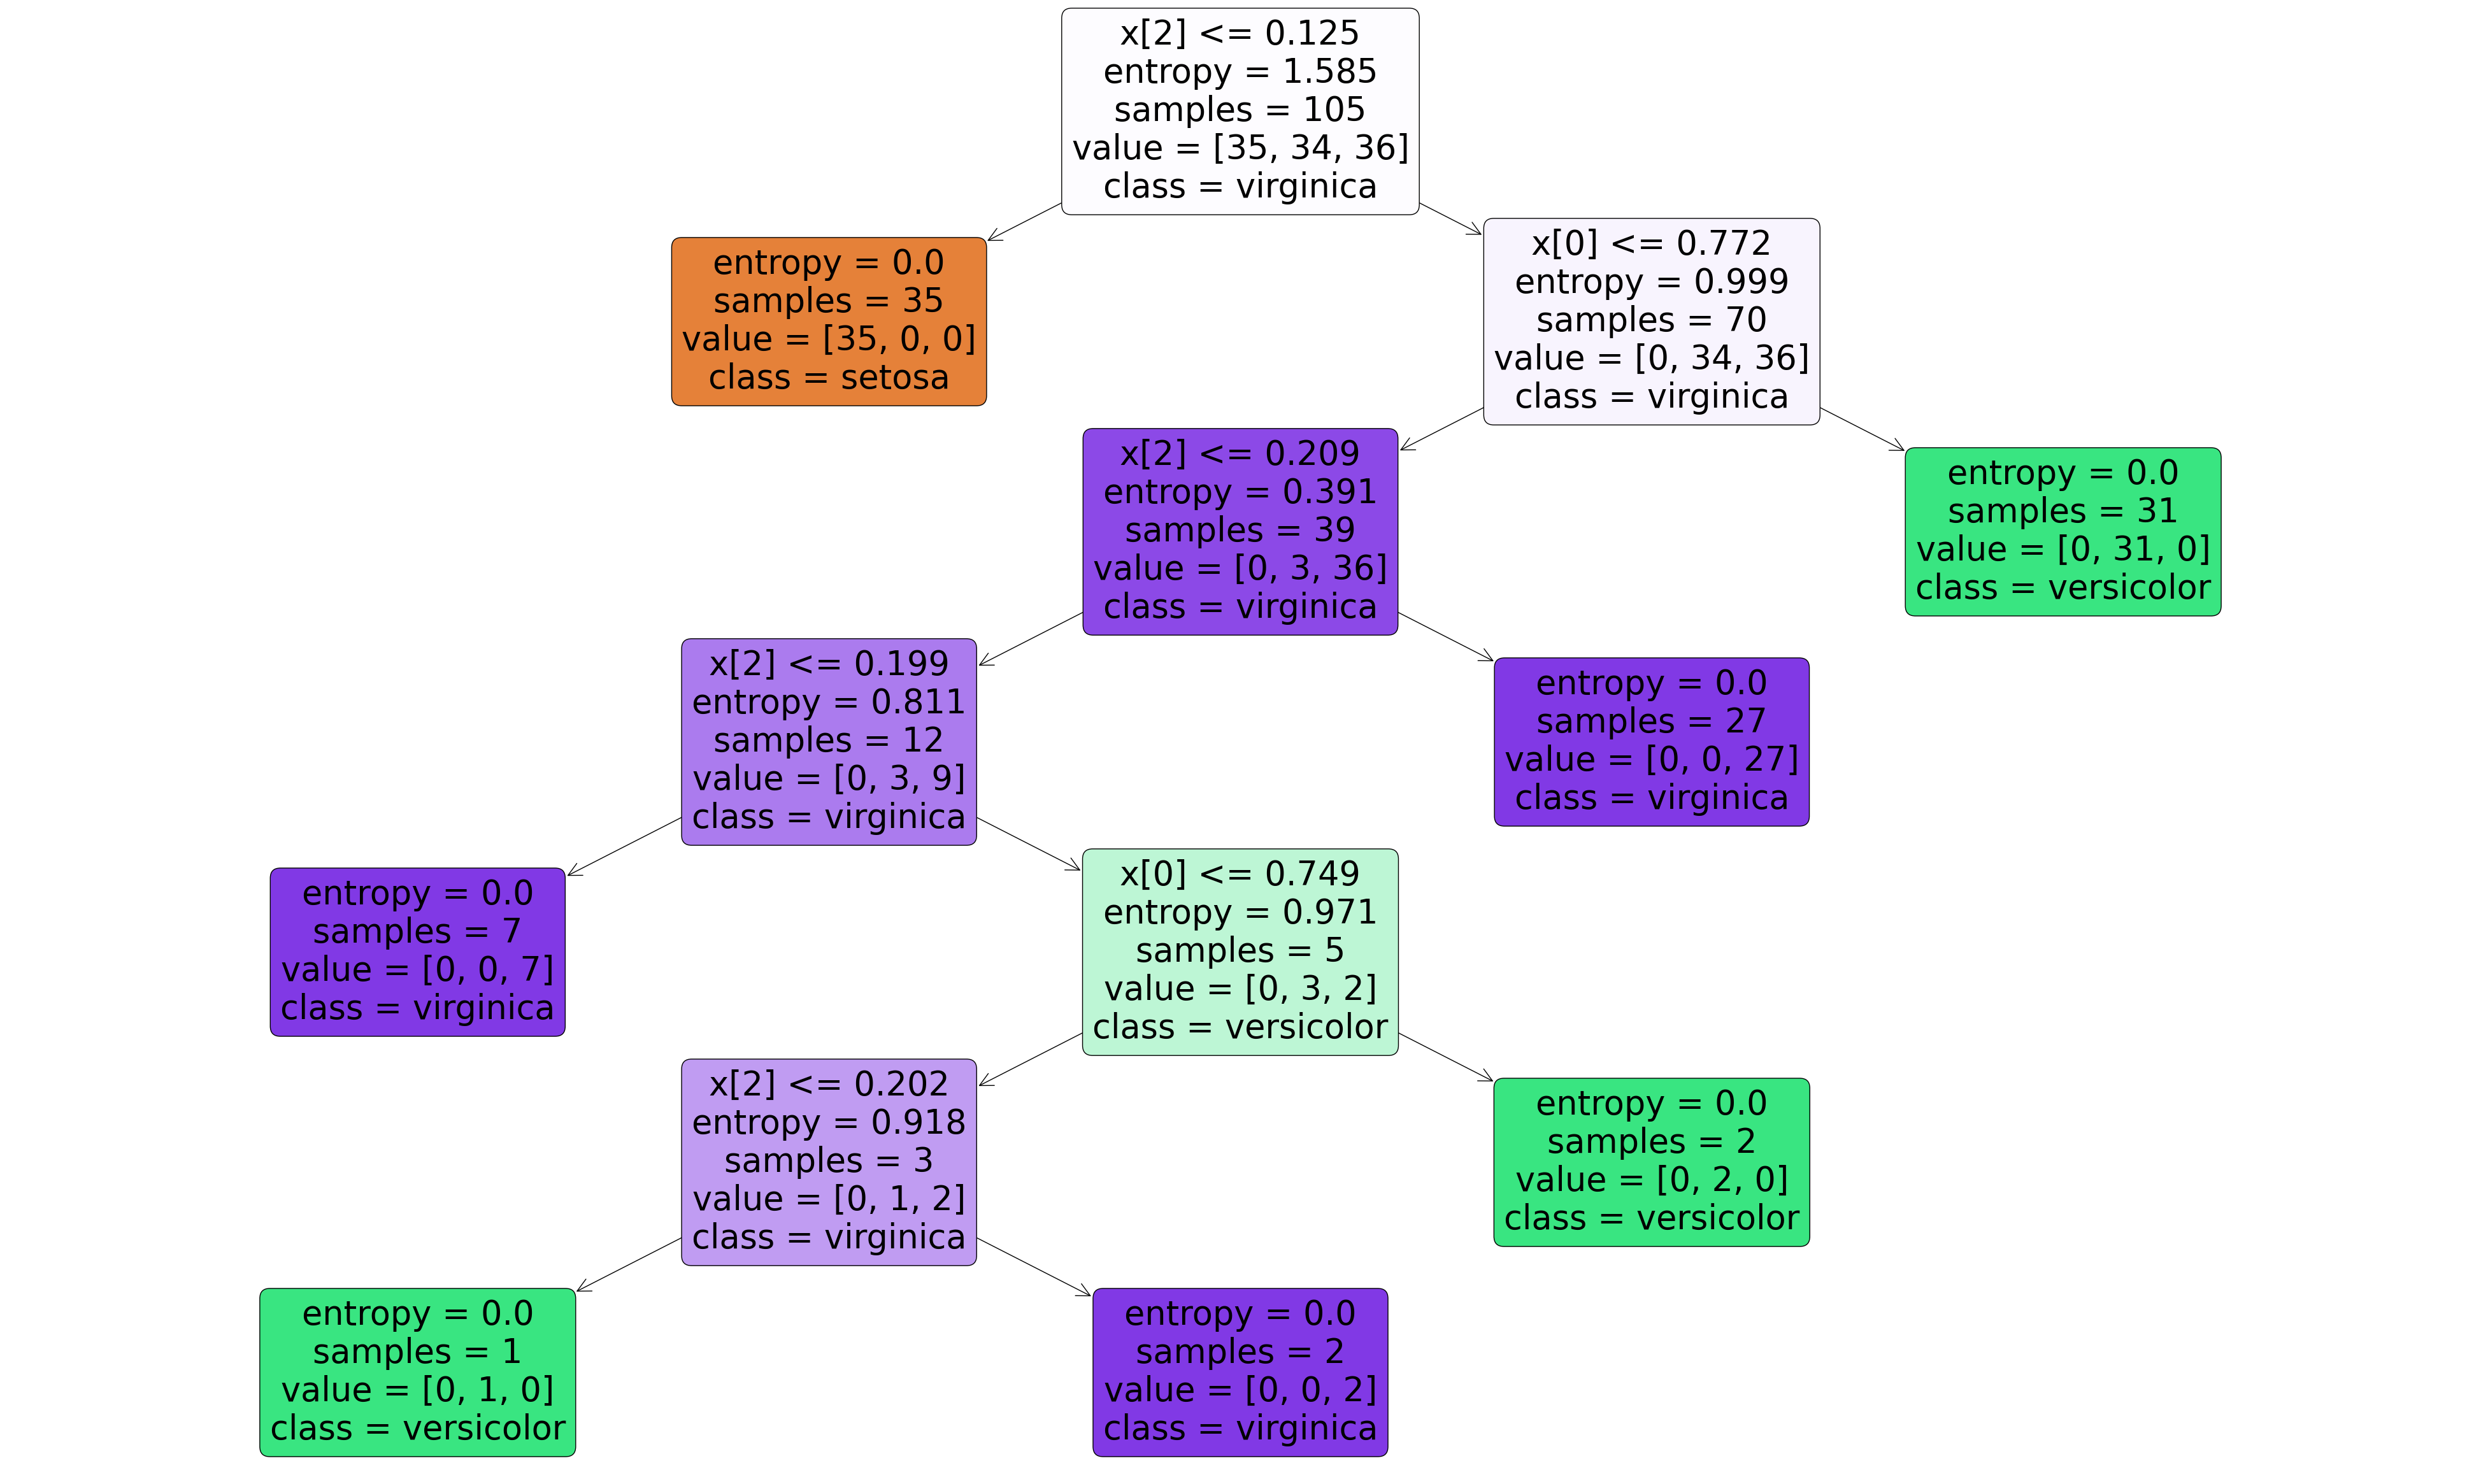

In [8]:
from sklearn import tree

plt.figure(figsize=(50,30))
tree_plot = tree.plot_tree(clf_tree, class_names=le.classes_, filled = True, rounded=True)

## 6: Prediction

Here we call the predict function as dicussed earlier, passing in the test data, and <b>NO</b> labels.  What we get is a set of _predited_ labels, given the model we created. 

In [9]:
y_hat = clf_tree.predict(X_test)
y_hat

array([0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 0,
       1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 1,
       2])

In [10]:
y_hat_proba = clf_tree.predict_proba(X_test)
y_hat_proba

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## 7: Test the accuracy of Model

Here we have used accuracy and confusion matrix, but bellow we explain some other Evaluation metrices.

Sklearn calculated accuracy: 0.9333333333333333


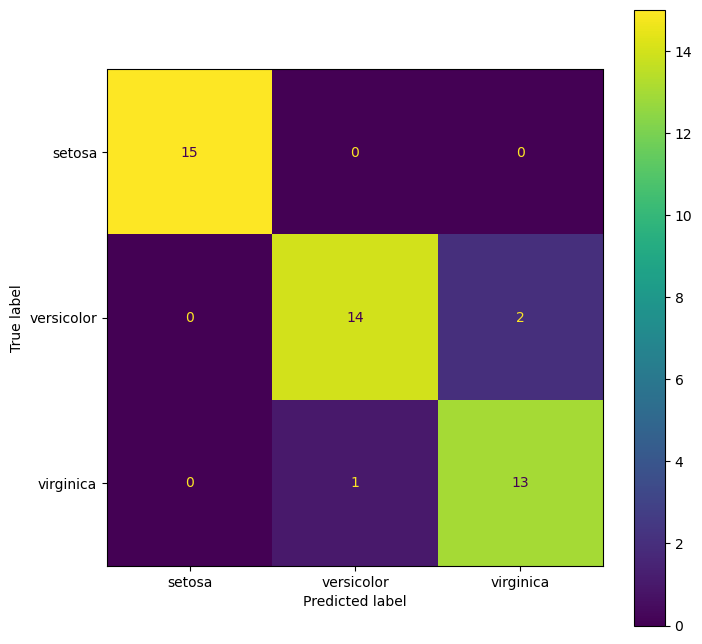

In [11]:
#we can use the built in accuracy metrics in sklearn.
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_hat)
print('Sklearn calculated accuracy:',accuracy)

#we can get the confusion matrix
cm = confusion_matrix(y_test, y_hat)

#we can plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()

## Part B: Evaluating Classifiers


### Choosing the best Evaluation Matrix:
If we talk about classification problems, the most common metrics used are:

- Confusion Matrix
- Accuracy
- Precision
- Recall
- F1 score (f1)
- Area under the ROC (Receiver Operating Characteristic) curve or simply AUC (AUC):

If we calculate the area under the ROC curve, we are calculating another metric which is used very often when you have a dataset which has skewed binary targets. This metric is known as the Area Under ROC Curve or Area Under Curve or just simply AUC. There are many ways to calculate the area under the ROC curve
AUC is a widely used metric for skewed binary classification tasks in the industry, and a metric everyone should know about.

#### 1. Confusion Matrix: 
when we need to know how much samples we got right or wrong for each class. The values that were correct and correctly predicted are called true positives, the ones that were predicted as positives but weren't positives are called false positives. The same nomenclature of true negatives and false negatives is used for negative values.

#### 2. Accuracy: 
describes how many predictions our classifier got right. The lowest accuracy value is 0 and the highest is 1. That value is usually multiplied by 100 to obtain a percentage:

$$\text{Accuracy Score} = \frac{ \text{Number of correct predictions}} { \text{Total number of predictions}}$$
or
$$ \text{Accuracy Score} =\frac{ \text{True Positives} + \text{True Negatives}} { \text{Number of Examples}} $$

#### 3. Precision: 
when our aim is to understand what correct prediction values were considered correct by our classifier. Precision will divide those true positive values by the samples that were predicted as positives;

$$ \text{precision} = \frac{ \text{True Positives}} {\text{True Positives + False Positives}} $$


#### 4. Recall:
commonly calculated along with precision to understand how many of the true positives were identified by our classifier. The recall is calculated by dividing the true positives by anything that should have been predicted as positive.
$$ \text{recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}$$


#### 5. F1 score (f1): 

F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but f1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. 
F1 score is a metric that combines both precision and recall. It is defined as a simple weighted average (harmonic mean) of precision and recall, we can represent the f1 score as:

$$ \text{f1-score} = 2∗ \frac{\text{precision ∗ recall}} {\text{precision + recall}}$$


### Evaluating Classifiers

In order to make explanation easier I have made some dummy predcitions 'y_pred', and the associated ground truth 'y_true':

In [12]:
#Here I have made some dummy predcitions, and the associated ground truth
y_pred = [0,0,0,0,2,0,0]
y_true = [0,0,0,1,2,1,0]

#we should have an accuracy of 71%. 5 of our predictions match our ground truth, and 2 do not.
# IE 5/7 ~ 71%

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy : " , accuracy)

Accuracy :  0.7142857142857143


##### Balanced Accuracy

In [13]:

from sklearn.metrics import balanced_accuracy_score

#with balanced accuracy we get a much lower score
accuracy = balanced_accuracy_score(y_true, y_pred)
print("Balanced Accuracy : " , accuracy)



Balanced Accuracy :  0.6666666666666666


`balanced_accuracy_score` function computes the Balanced accuracy, which avoids the inflated estimate produced by our accuracy score.
If we consider that the test data we used before is imbalanced. Such that our histogram of class labels is : `[4,2,1]`
Then predicting class 0 often will result in a high accuracy score, because the classifier might be exploiting the distribution of our  data, therefore we're not assessing the predictive power of the classifier.



Precision is the ability of the classifier not to label as positive a sample that is negative, and recall is the ability of the classifier to find all the positive samples.


Precision score manually calculated:  0.6666666666666666
Recall score manually calculated :  0.3333333333333333

Precision score using buit-in function :  0.6666666666666666
Recall score using buit-in function :  0.3333333333333333

Precision score :  [0.5        0.66666667 1.        ]
Recall score :  [1.         0.33333333 0.        ]


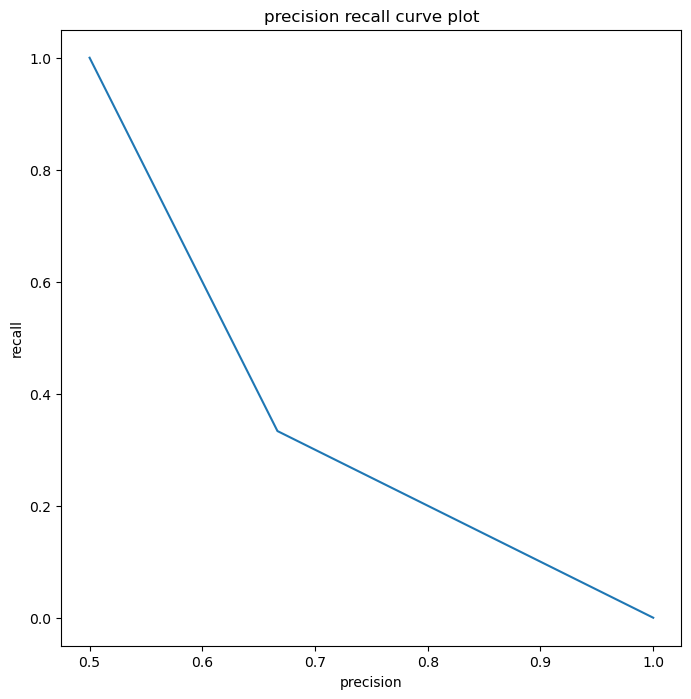

In [14]:
# binary class example
from sklearn.metrics import precision_score, recall_score, confusion_matrix

y_pred = [0,0,0,0,1,1,0,0,0,1,0,0]
y_true = [0,1,0,1,1,1,1,0,0,0,0,1]

#given a two class problem we can obtain the true positive, true negative, false positive, and false negative scores.
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

#we can either calculate the precision and recall scores manually

precision_man = tp / (tp + fp)
recall_man = tp / (tp + fn)

print('Precision score manually calculated: ', precision_man)
print('Recall score manually calculated : ', recall_man)
print()

#or we can use the functions
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print('Precision score using buit-in function : ', precision)
print('Recall score using buit-in function : ', recall)

print()

#we can plot the precision recall curve
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_true, y_pred)


print('Precision score : ', precision)
print('Recall score : ', recall)

import matplotlib.pyplot as plt
plt.plot(precision, recall)
plt.title('precision recall curve plot')
plt.xlabel('precision')
plt.ylabel('recall')
plt.show()


### Multi Class Precision and Recall

when calculating the precision and recall for multiple classes we have a couple of strategies.

`'micro'`: Calculate metrics globally by counting the total true positives, false negatives and false positives.
   
`'macro'`: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
    
`'weighted'`: Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). 

This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.


In [15]:
from sklearn.metrics import precision_score, recall_score

y_pred = [0,0,0,0,2,0,0]
y_true = [0,0,0,1,2,1,0]

macro_precision = precision_score(y_true, y_pred, average='macro')
print('macro_precision', macro_precision)

micro_precision = precision_score(y_true, y_pred, average='micro')
print('micro_precision', micro_precision)

weighted_precision = precision_score(y_true, y_pred, average='weighted')
print('weighted_precision', weighted_precision)

macro_recall = recall_score(y_true, y_pred, average='macro')
print('macro_recall', macro_recall)

micro_recall = recall_score(y_true, y_pred, average='micro')
print('micro_recall', micro_recall)

weighted_recall = recall_score(y_true, y_pred, average='weighted')
print('weighted_recall', weighted_recall)


macro_precision 0.5555555555555555
micro_precision 0.7142857142857143
weighted_precision 0.5238095238095238
macro_recall 0.6666666666666666
micro_recall 0.7142857142857143
weighted_recall 0.7142857142857143


### Receiver Operating Characteristic (ROC)



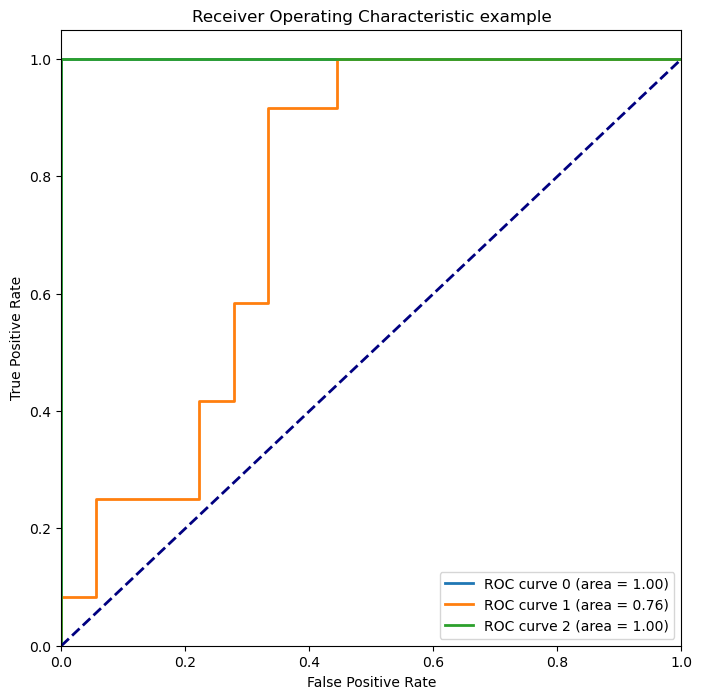

In [16]:

from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels

# we read the iris data already in pat A-section 1.

classes = unique_labels(y)
# Binarize the output
y_bin = label_binarize(y, classes=classes)
n_classes = y_bin.shape[1]

trainX, testX, train_y, test_y = train_test_split(X, y_bin, test_size=0.2)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True))
y_score = classifier.fit(trainX, train_y).decision_function(testX)
# we can use decision_function to obtain probability values for y
# the function values are proportional to the distance of the samples X to the separating hyperplane.

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2

#plot each roc curve in the onevsrest classifier.
#class setosa vs rest, class versicolor vs rest and class virginica vs rest
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
            lw=lw, label='ROC curve %s (area = %0.2f)' % (classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic example')
plt.legend(loc="lower right")
plt.show()


### Evaluate the Decision tree model


To avoid confussion let's read and do all the processes agian including partitioning to train:test, normalize the data, etc.

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer

iris = pd.read_csv("C:\DM-DATA\Iris.csv")

X = iris[["sepal_length", "petal_length", "petal_width"]]
y = iris["species"]

#encode the labels from strings to values.
le = LabelEncoder()

y = le.fit_transform(y)
print("Original labels", le.classes_)
print("Labels after encoding", y)

#Divide the data into train and test splits

from sklearn.model_selection import train_test_split
#using train test split, i take the data and labels, and split them into a 70/30 train test set. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)


normalizer = Normalizer(norm='l2')
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

Original labels ['setosa' 'versicolor' 'virginica']
Labels after encoding [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Let's evaluate the model performance. We are evaluating first the accuracy for the train set.

In [18]:
clf_tree.score(X_train, y_train)
acc = round(clf_tree.score(X_train, y_train) * 100, 2)
print("Decision tree accuracy (train set):", acc, '%')

Decision tree accuracy (train set): 100.0 %


Then we evaluate the accuracy for the test set.

In [19]:
clf_tree.score(X_test, y_test)
acc = round(clf_tree.score(X_test, y_test) * 100, 2)
print("Decision tree accuracy (test set):", acc, '%')

Decision tree accuracy (test set): 93.33 %


The accuracy for the training set is much better than the accuracy for the test set. 

This means we have higher variance than bias. The model cannot predict as well as the training set.

Let's now plot the classification report for test data.

In [20]:
from sklearn import metrics

clf_tree.score(X_train, y_train)
y_hat_tree = clf_tree.predict(X_test)
print(metrics.classification_report(y_test, y_hat_tree, target_names=['setosa', 'versicolor', 'virginica']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.88      0.90        16
   virginica       0.87      0.93      0.90        14

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



*Support is the number of actual occurrences of the class in the specified dataset. 

Since this value of f1-scores are very close to 1, it tells us that the model does a good job of predicting.

### ROC curve

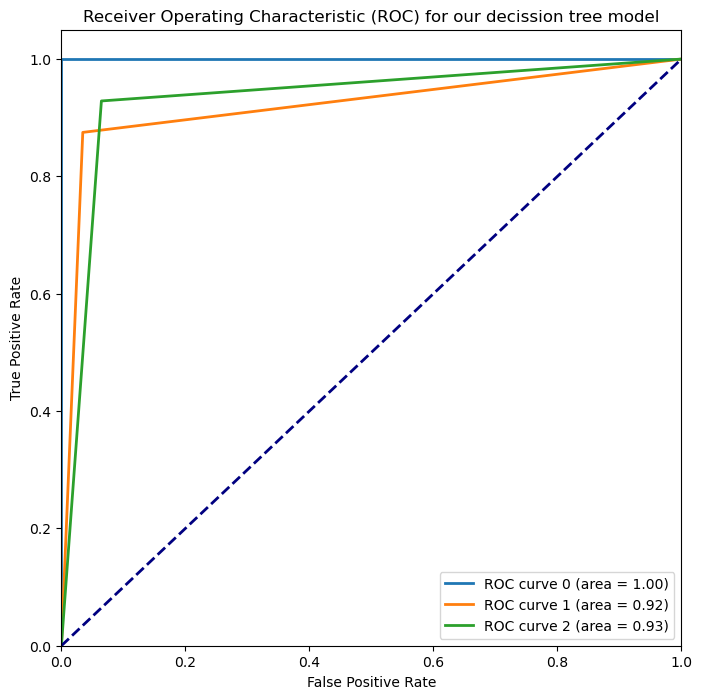

In [21]:
# Learn to predict each class against the other

from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)

y_onehot_test = label_binarizer.transform(y_test)

y_onehot_test.shape  # (n_samples, n_classes)


clf_tree.score(X_train, y_train)

y_score = clf_tree.predict_proba(X_test)

y_pred = clf_tree.predict(X_test)


# Compute ROC curve and ROC area for each class

classes = np.unique(y)
n_classes = len(np.unique(y))


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2


#plot each roc curve in the onevsrest classifier.
#class setosa vs rest, class versicolor vs rest and class virginica vs rest
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
            lw=lw, label='ROC curve %s (area = %0.2f)' % (classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for our decission tree model')
plt.legend(loc="lower right")
plt.show()

We can then compare the ROC curve output with the confusion matrix

Sklearn calculated accuracy: 0.9333333333333333


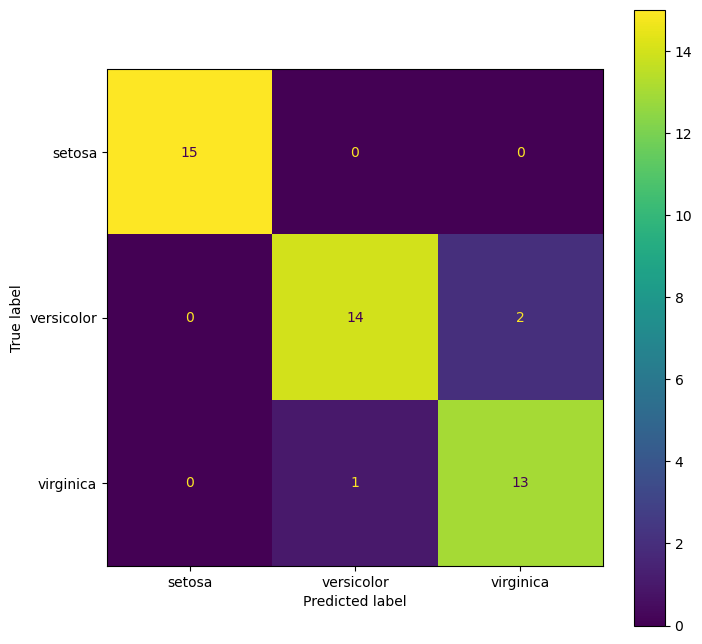

In [22]:
#we can use the built in accuracy metrics in sklearn.
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_hat_tree)
print('Sklearn calculated accuracy:',accuracy)

#we can get the confusion matrix
cm = confusion_matrix(y_test, y_hat_tree)

#we can plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()

### Grid Search Cross Validation

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#setup your nearest classifier. 
from sklearn.neighbors import KNeighborsClassifier

#Here i create a 2NN classifier
kNN = KNeighborsClassifier(n_neighbors=2)

from sklearn.model_selection import GridSearchCV

#make a dictionary, where the parameter we want to set, and the range of values we want to cross-validate over
#in this example I am going to set the k parameter in kNN, where I am testing between 1 to 7.
parameters = {
    "n_neighbors" : [1,3,5,7]
}

clf = GridSearchCV(kNN,param_grid=parameters)
clf.fit(X_train, y_train)

#here we can see the best parameter was for n_neighbors
print('Best parameter for n_neighbors', clf.best_params_)

#collect predictions on test data
y_hat_knn = clf.predict(X_test)


#calculate the score - accuracy / error or other metrics.
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_hat_knn)
print('accuracy', accuracy)

Best parameter for n_neighbors {'n_neighbors': 1}
accuracy 0.9


### Pre-processing data and building a pipeline
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline


In [24]:

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA

estimators = [("PCA", PCA()), ("clf", SVC())]

pipe = Pipeline(estimators)
print(pipe)
print('train lables', y_train)

#we can use a pipeline like a classifier or transformer.
pipe.fit(X_train, y_train)

y_preds = pipe.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_preds)
print('Accuracy', accuracy)


Pipeline(steps=[('PCA', PCA()), ('clf', SVC())])
train lables [1 2 1 0 1 2 0 1 1 0 2 1 0 2 2 1 1 0 2 0 0 2 2 1 2 0 1 0 1 0 2 2 2 1 2 1 2
 0 2 0 2 0 1 0 0 0 2 1 2 2 0 1 2 0 1 1 2 1 1 0 2 2 1 0 0 2 1 1 0 0 0 2 0 2
 2 2 1 1 1 0 2 1 2 2 0 0 2 2 2 0 1 0 0 0 1 1 2 1 0 1 1 2 1 2 1 2 2 2 1 0 0
 0 1 0 1 0 0 0 0 1]
Accuracy 1.0


### Grid Searching on a pipeline



In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

estimators = Pipeline([("PCA", PCA()), ("clf", SVC())])


#we build the parameter grid the same way as we did before.
#This time we can specify parameters to set for our CV by using the element in the pipline, and their components.
param_grid = {"PCA": ["passthrough", PCA(5), PCA(10)], "clf__C": [0.1, 10, 100]}


from sklearn.model_selection import GridSearchCV
#use our pipeline and the parameter grid with GridSearchCV
clf = GridSearchCV(estimators, param_grid=param_grid)
clf.fit(X_train, y_train);

#here we can see the best parameter was for n_neighbors
print(clf.best_params_)

#collect predictions on test data
y_hat = clf.predict(X_test)


#calculate the score - accuracy / error or other metrics.
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_hat)
print('Accuracy', accuracy)

{'PCA': 'passthrough', 'clf__C': 10}
Accuracy 0.9333333333333333
